Kernelized support vector machines (SVM)
----

- 분류와 회귀에 모두 사용할 수 있음.

In [1]:
%matplotlib inline

Text(0, 0.5, 'property 1')

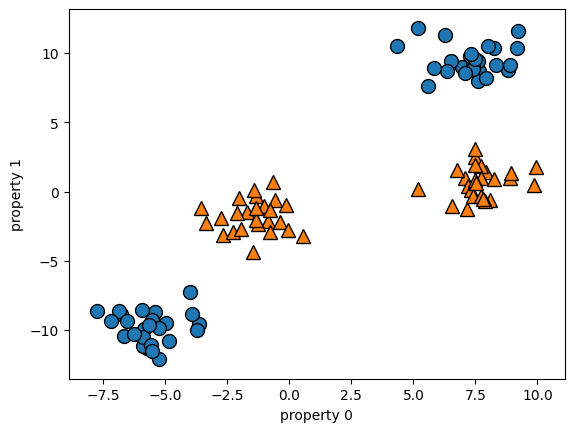

In [2]:
import mglearn
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X,y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("property 0")
plt.ylabel("property 1")

d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'property 1')

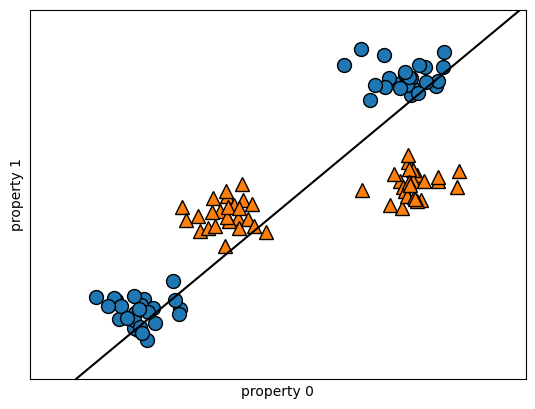

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("property 0")
plt.ylabel("property 1")

In [4]:
import numpy as np
X_new = np.hstack([X, X[:,1:]**2])
#horizontal stack: 가로로 행렬 결합하기.
#property 1 의 값을 제곱한 것을 property 2로서 정의해서 추가.

C:\Users\jwkim\AppData\Local\Temp\ipykernel_3608\3663476217.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
C:\Users\jwkim\AppData\Local\Temp\ipykernel_3608\3663476217.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
C:\Users\jwkim\AppData\Local\Temp\ipykernel_3608\3663476217.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


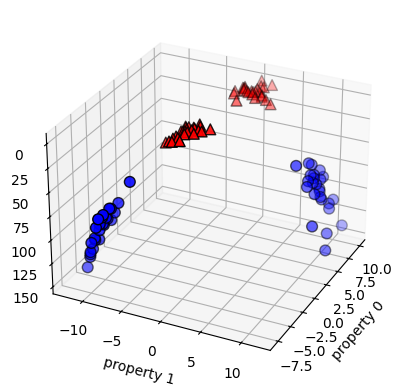

In [13]:
from mpl_toolkits.mplot3d import Axes3D, axes3d


figure= plt.figure()

ax = figure.add_subplot(projection='3d')
ax.view_init(elev=-152, azim=-26)
#elev : elevation angle: 양각
#azim: azimuthal angle: 방위각
#보는 각도.

mask = y==0
#이것은 y==0 인 위치만 true가 되는 vector가 된다.
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("property 0")
ax.set_ylabel("property 1")
ax.set_zlabel("property 1**2")

figure.show()

In [14]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
#ravel() 함수는 다차원 배열을 1차원으로 평평하게 해주는 것.

d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\machine learning study\.venv\for_machine_learning_study\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\jwkim\AppData\Local\Temp\ipykernel_3608\4152847434.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
C:\Users\jwkim\AppData\Local\Temp\ipykernel_3608\4152847434.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')


Text(0.5, 0, 'property 1**2')

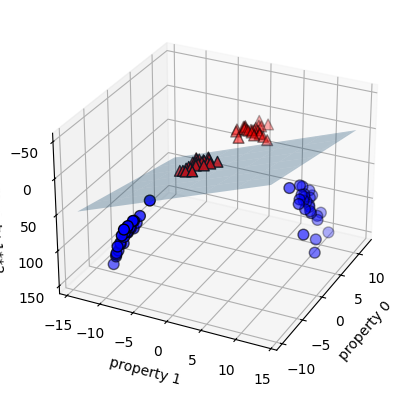

In [19]:
figure = plt.figure()
ax = figure.add_subplot(projection='3d')
ax.view_init(elev=-152, azim=-26)

xx = np.linspace(X_new[:,0].min() -2, X_new[:,0].max()+2, 50)
yy = np.linspace(X_new[:,1].min() -2, X_new[:,1].max()+2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY +intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
#rstride, cstride는 색의 변화율. 클 수록 색이 거치게 바뀐다고 함.

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("property 0")
ax.set_ylabel("property 1")
ax.set_zlabel("property 1**2")

Text(0, 0.5, 'property 1')

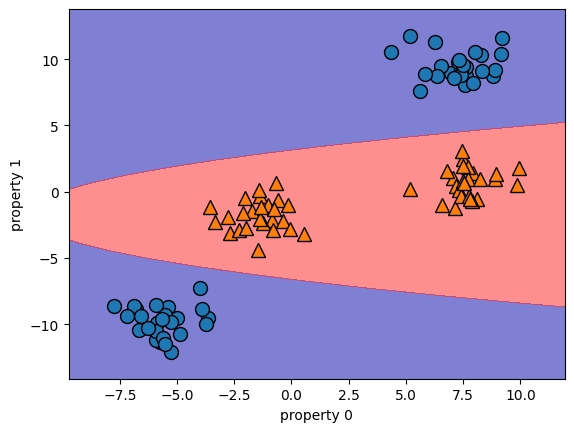

In [26]:
#이것을 2차원에서 보기.

ZZ = YY**2

dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
#np.c_ : 두 배열을 가로 방향으로 합치기.
# decision_function: sample의 confidence score 를 구해주는 함수라고 하는데. 
# 각 sample이 hyperplane으로부터 먼 정도를 나타내는 signed distance에 비례하는 값인 듯.
# 총 2500개의 가능한 samples 에 대해서 구한 결과가 나온다.

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("property 0")
plt.ylabel("property 1")
# 즉, 실제 2차원에서 아래에 나타나는 영역에 따라 그 값이 판정되는 셈이다.